In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [9]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [10]:
clf = DecisionTreeClassifier

In [15]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

AttributeError: 'DataFrame' object has no attribute '_validate_params'

In [16]:
accuracy_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [17]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6358959311424099

In [18]:
# bins 
kbin_age = KBinsDiscretizer(n_bins=15,encode = 'ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode= 'ordinal',strategy='quantile')

In [20]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [23]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [31]:
trf.named_transformers_['first'].bin_edges_

array([array([ 1.        ,  9.        , 15.9       , 17.        , 20.        ,
              21.        , 24.        , 26.        , 28.        , 30.1       ,
              33.66666667, 36.        , 38.6       , 44.06666667, 52.        ,
              62.        ])                                                   ],
      dtype=object)

In [36]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [41]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                             bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['age_labels'] = pd.cut(x=X_train['Fare'],
                             bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [42]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels
528,39.0,11.0,7.9250,3.0,"(7.773, 7.925]"
523,44.0,12.0,57.9792,12.0,"(53.227, 79.277]"
509,26.0,6.0,56.4958,12.0,"(53.227, 79.277]"
316,24.0,5.0,26.0000,9.0,"(22.62, 26.353]"
102,21.0,4.0,77.2875,13.0,"(53.227, 79.277]"


In [44]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2= clf.predict(X_test_trf)

In [45]:
accuracy_score(y_test,y_pred2)

0.6503496503496503

In [46]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv = 10,scoring = 'accuracy'))

0.6303012519561816

In [49]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/nfs/cms/mtech23/lute.gaurav/.local/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6331181533646322


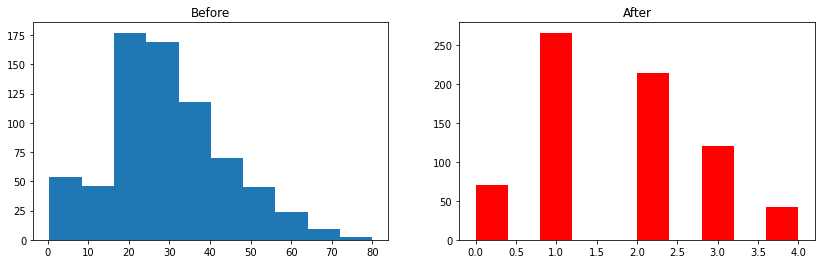

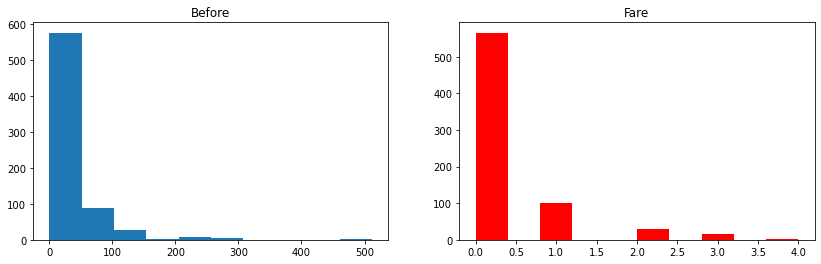

In [52]:
discretize(5,'kmeans')